In [33]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")

In [13]:
train['essay_id'].head(20)

0     000d118
1     000fe60
2     001ab80
3     001bdc0
4     002ba53
5     0030e86
6     0033037
7     0033bf4
8     0036253
9     0040e27
10    004229b
11    0047cb3
12    005a72e
13    00613e3
14    0065bd6
15    0066c7c
16    006c931
17    006d0e1
18    0072128
19    0079938
Name: essay_id, dtype: object

In [4]:
def quadratic_weighted_kappa(y_true, y_pred):
    y_true = y_true + a
    y_pred = (y_pred + a).clip(1, 6).round()
    qwk = cohen_kappa_score(y_true, y_pred, weights="quadratic")
    return 'QWK', qwk, True
def qwk_obj(y_true, y_pred):
    labels = y_true + a
    preds = y_pred + a
    preds = preds.clip(1, 6)
    f = 1/2*np.sum((preds-labels)**2)
    g = 1/2*np.sum((preds-a)**2+b)
    df = preds - labels
    dg = preds - a
    grad = (df/g - f*dg/g**2)*len(labels)
    hess = np.ones(len(labels))
    return grad, hess
a = 2.948
b = 1.092

In [27]:
x

array([1.0000e+00, 2.0000e+00, 3.0000e+00, ..., 1.7305e+04, 1.7306e+04,
       1.7307e+04])

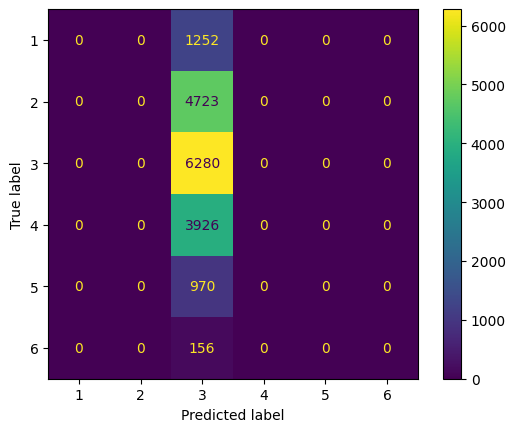

In [29]:
svm_classifier = SVC()
x = np.linspace(1, len(train), len(train)).reshape(-1,1)
y = train.score
svm_classifier.fit(x, y)
y_pred = svm_classifier.predict(x)

f1_fold = f1_score(y, y_pred, average='weighted')
kappa_fold = cohen_kappa_score(y, y_pred, weights='quadratic')

cm = confusion_matrix(y, y_pred, labels=[x for x in range(1,7)])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[x for x in range(1,7)])
disp.plot()
# plt.show()

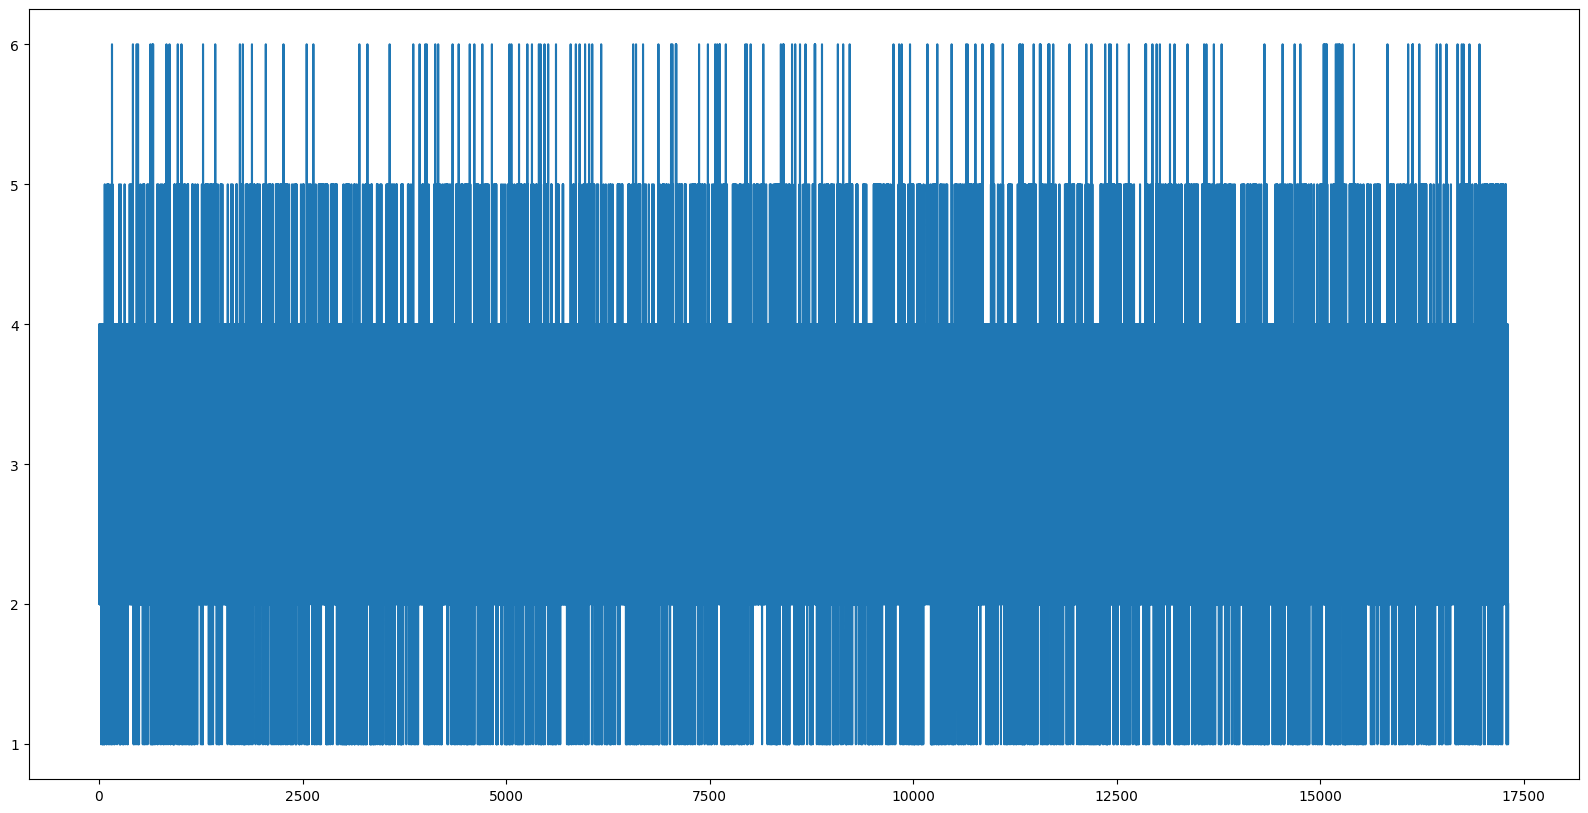

In [37]:
plt.figure(figsize=(20, 10))
plt.plot(x,y)

In [38]:
train['score'].value_counts()

score
3    6280
2    4723
4    3926
1    1252
5     970
6     156
Name: count, dtype: int64